In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

QUESTION 1 -

Import and store the data in a data frame. (2.5 points)

In [2]:
##importing the dataset
df1 = pd.read_csv("airline.csv")
df1.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
##checking the dimension of the dataframe
df1.shape

(1000, 11)

In [4]:
##checking the dataframe for datatypes & null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


QUESTION 3 - 

Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [5]:
##df = df[['favorite_color','grade','name','age']]
df1 = df1[['City1', 'City2', 'Distance', 'Average weekly passengers', 'market leading airline', 'market share1', 'Average fare', 'Low price airline', 'market share2', 'price', 'Average Fare' ]]
df1.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price,Average Fare
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03,114.47
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94,122.47
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12,214.42
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86,69.40
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42,158.13


QUESTION 2 - 

Remove the outliers from the data (5 points)

In [6]:
a = df1.quantile(0.25)
b = df1.quantile(0.75)

IQR = b-a
df1_noout = df1[~((df1 < (a - 1.5 * IQR)) |(df1 > (b + 1.5 * IQR))).any(axis=1)]

df1_noout.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price,Average Fare
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03,114.47
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94,122.47
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12,214.42
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86,69.40
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42,158.13


In [7]:
##checking the dimension of the dataframe free of outliers
df1_noout.shape

(885, 11)

HANDLING CATEGORICAL DATA

1. ONE HOT ENCODING FOR THE FOUR NOMINAL DATA

In [8]:
##one hot encoding
df2 = pd.get_dummies(df1_noout)
df2.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,Average Fare,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,528,424.56,70.19,111.03,70.19,111.03,114.47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,276.84,75.10,123.09,17.23,118.94,122.47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852,215.76,78.89,223.98,2.77,167.12,214.42,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,288,606.84,96.97,68.86,96.97,68.86,69.40,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,723,313.04,39.79,161.36,15.34,145.42,158.13,0,0,1,...,0,0,0,0,0,0,0,0,1,0


QUESTION 4 - 

Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [9]:
##computing Pearsons correlation, absolute values & storing them in a dataframe
c = df2.corr().abs()
c.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,Average Fare,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
Distance,1.000000,0.129632,0.547952,0.489721,0.361519,0.539894,0.522650,0.017235,0.011850,0.032210,...,0.023815,0.094495,0.031604,0.049474,0.054131,0.033720,0.015153,0.031277,0.174988,0.014706
Average weekly passengers,0.129632,1.000000,0.021769,0.163736,0.076176,0.209018,0.197005,0.039172,0.031993,0.053817,...,0.021966,0.044906,0.117982,0.049631,0.077232,0.051728,0.081984,0.051629,0.083152,0.015698
market share1,0.547952,0.021769,1.000000,0.193382,0.281182,0.314555,0.207955,0.038515,0.129791,0.023874,...,0.009989,0.000728,0.004213,0.081531,0.001548,0.079767,0.080960,0.055311,0.101218,0.012991
Average fare,0.489721,0.163736,0.193382,1.000000,0.519442,0.794157,0.979713,0.013779,0.046805,0.021137,...,0.044124,0.079399,0.066917,0.050242,0.078179,0.022745,0.168584,0.151201,0.363476,0.025443
market share2,0.361519,0.076176,0.281182,0.519442,1.000000,0.260912,0.493555,0.046532,0.099101,0.016240,...,0.025400,0.073537,0.099983,0.061549,0.075362,0.038367,0.120787,0.071163,0.378108,0.047128


In [10]:
##displaying only those correlation scores < 0.1 
rel = c[c<0.1]
rel

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,Average Fare,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
Distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017235,0.011850,0.032210,...,0.023815,0.094495,0.031604,0.049474,0.054131,0.033720,0.015153,0.031277,NaN,0.014706
Average weekly passengers,NaN,NaN,0.021769,NaN,0.076176,NaN,NaN,0.039172,0.031993,0.053817,...,0.021966,0.044906,NaN,0.049631,0.077232,0.051728,0.081984,0.051629,0.083152,0.015698
market share1,NaN,0.021769,NaN,NaN,NaN,NaN,NaN,0.038515,NaN,0.023874,...,0.009989,0.000728,0.004213,0.081531,0.001548,0.079767,0.080960,0.055311,NaN,0.012991
Average fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013779,0.046805,0.021137,...,0.044124,0.079399,0.066917,0.050242,0.078179,0.022745,NaN,NaN,NaN,0.025443
market share2,NaN,0.076176,NaN,NaN,NaN,NaN,NaN,0.046532,0.099101,0.016240,...,0.025400,0.073537,0.099983,0.061549,0.075362,0.038367,NaN,0.071163,NaN,0.047128
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146,0.035091,0.011780,...,0.040291,NaN,0.053045,0.011265,0.016871,0.040212,0.098144,0.093087,NaN,0.066470
Average Fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009688,0.048420,0.024181,...,0.026989,0.075832,0.060200,0.042864,0.060881,0.005389,NaN,NaN,NaN,0.027139
City1_ABQ,0.017235,0.039172,0.038515,0.013779,0.046532,0.016146,0.009688,NaN,0.009709,0.013762,...,0.004846,NaN,0.017593,0.026521,0.012866,0.020761,0.035631,0.049671,0.070662,0.008403
City1_ACY,0.011850,0.031993,NaN,0.046805,0.099101,0.035091,0.048420,0.009709,NaN,0.006436,...,0.002266,0.015958,NaN,0.012402,0.006016,0.009709,0.016663,0.023228,0.037466,0.003930
City1_ALB,0.032210,0.053817,0.023874,0.021137,0.016240,0.011780,0.024181,0.013762,0.006436,NaN,...,0.003212,0.022619,0.011662,0.017580,0.008528,0.013762,0.023618,0.005823,0.059332,0.005570


In [11]:
##slicing the dependent variable column only (Average Fare)
act = rel.iloc[:, 6]
actual = pd.DataFrame(act)
actual

,Average Fare
Distance,NaN
Average weekly passengers,NaN
market share1,NaN
Average fare,NaN
market share2,NaN
price,NaN
Average Fare,NaN
City1_ABQ,0.009688
City1_ACY,0.048420
City1_ALB,0.024181


In [12]:
##dropping Null values from the sliced dataframe
filtered = actual.dropna()
filtered

,Average Fare
City1_ABQ,0.009688
City1_ACY,0.048420
City1_ALB,0.024181
City1_AMA,0.061534
City1_ATL,0.033772
City1_AUS,0.018667
City1_BDL,0.009286
City1_BHM,0.043772
City1_BNA,0.019372
City1_BTV,0.046798


In [13]:
##dropping the column names with correlation scores < 0.1 from the main dataframe
f = filtered.index
df3 = df2.drop(df2[f], axis=1)
df3.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,Average Fare,City1_BOI,City1_BOS,City1_CLT,...,market leading airline_FL,market leading airline_NW,market leading airline_UA,market leading airline_WN,Low price airline_AA,Low price airline_CO,Low price airline_FL,Low price airline_UA,Low price airline_US,Low price airline_WN
0,528,424.56,70.19,111.03,70.19,111.03,114.47,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,860,276.84,75.10,123.09,17.23,118.94,122.47,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,852,215.76,78.89,223.98,2.77,167.12,214.42,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,288,606.84,96.97,68.86,96.97,68.86,69.40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,723,313.04,39.79,161.36,15.34,145.42,158.13,0,0,0,...,0,0,1,0,0,0,0,0,0,1


QUESTION 5 -

Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

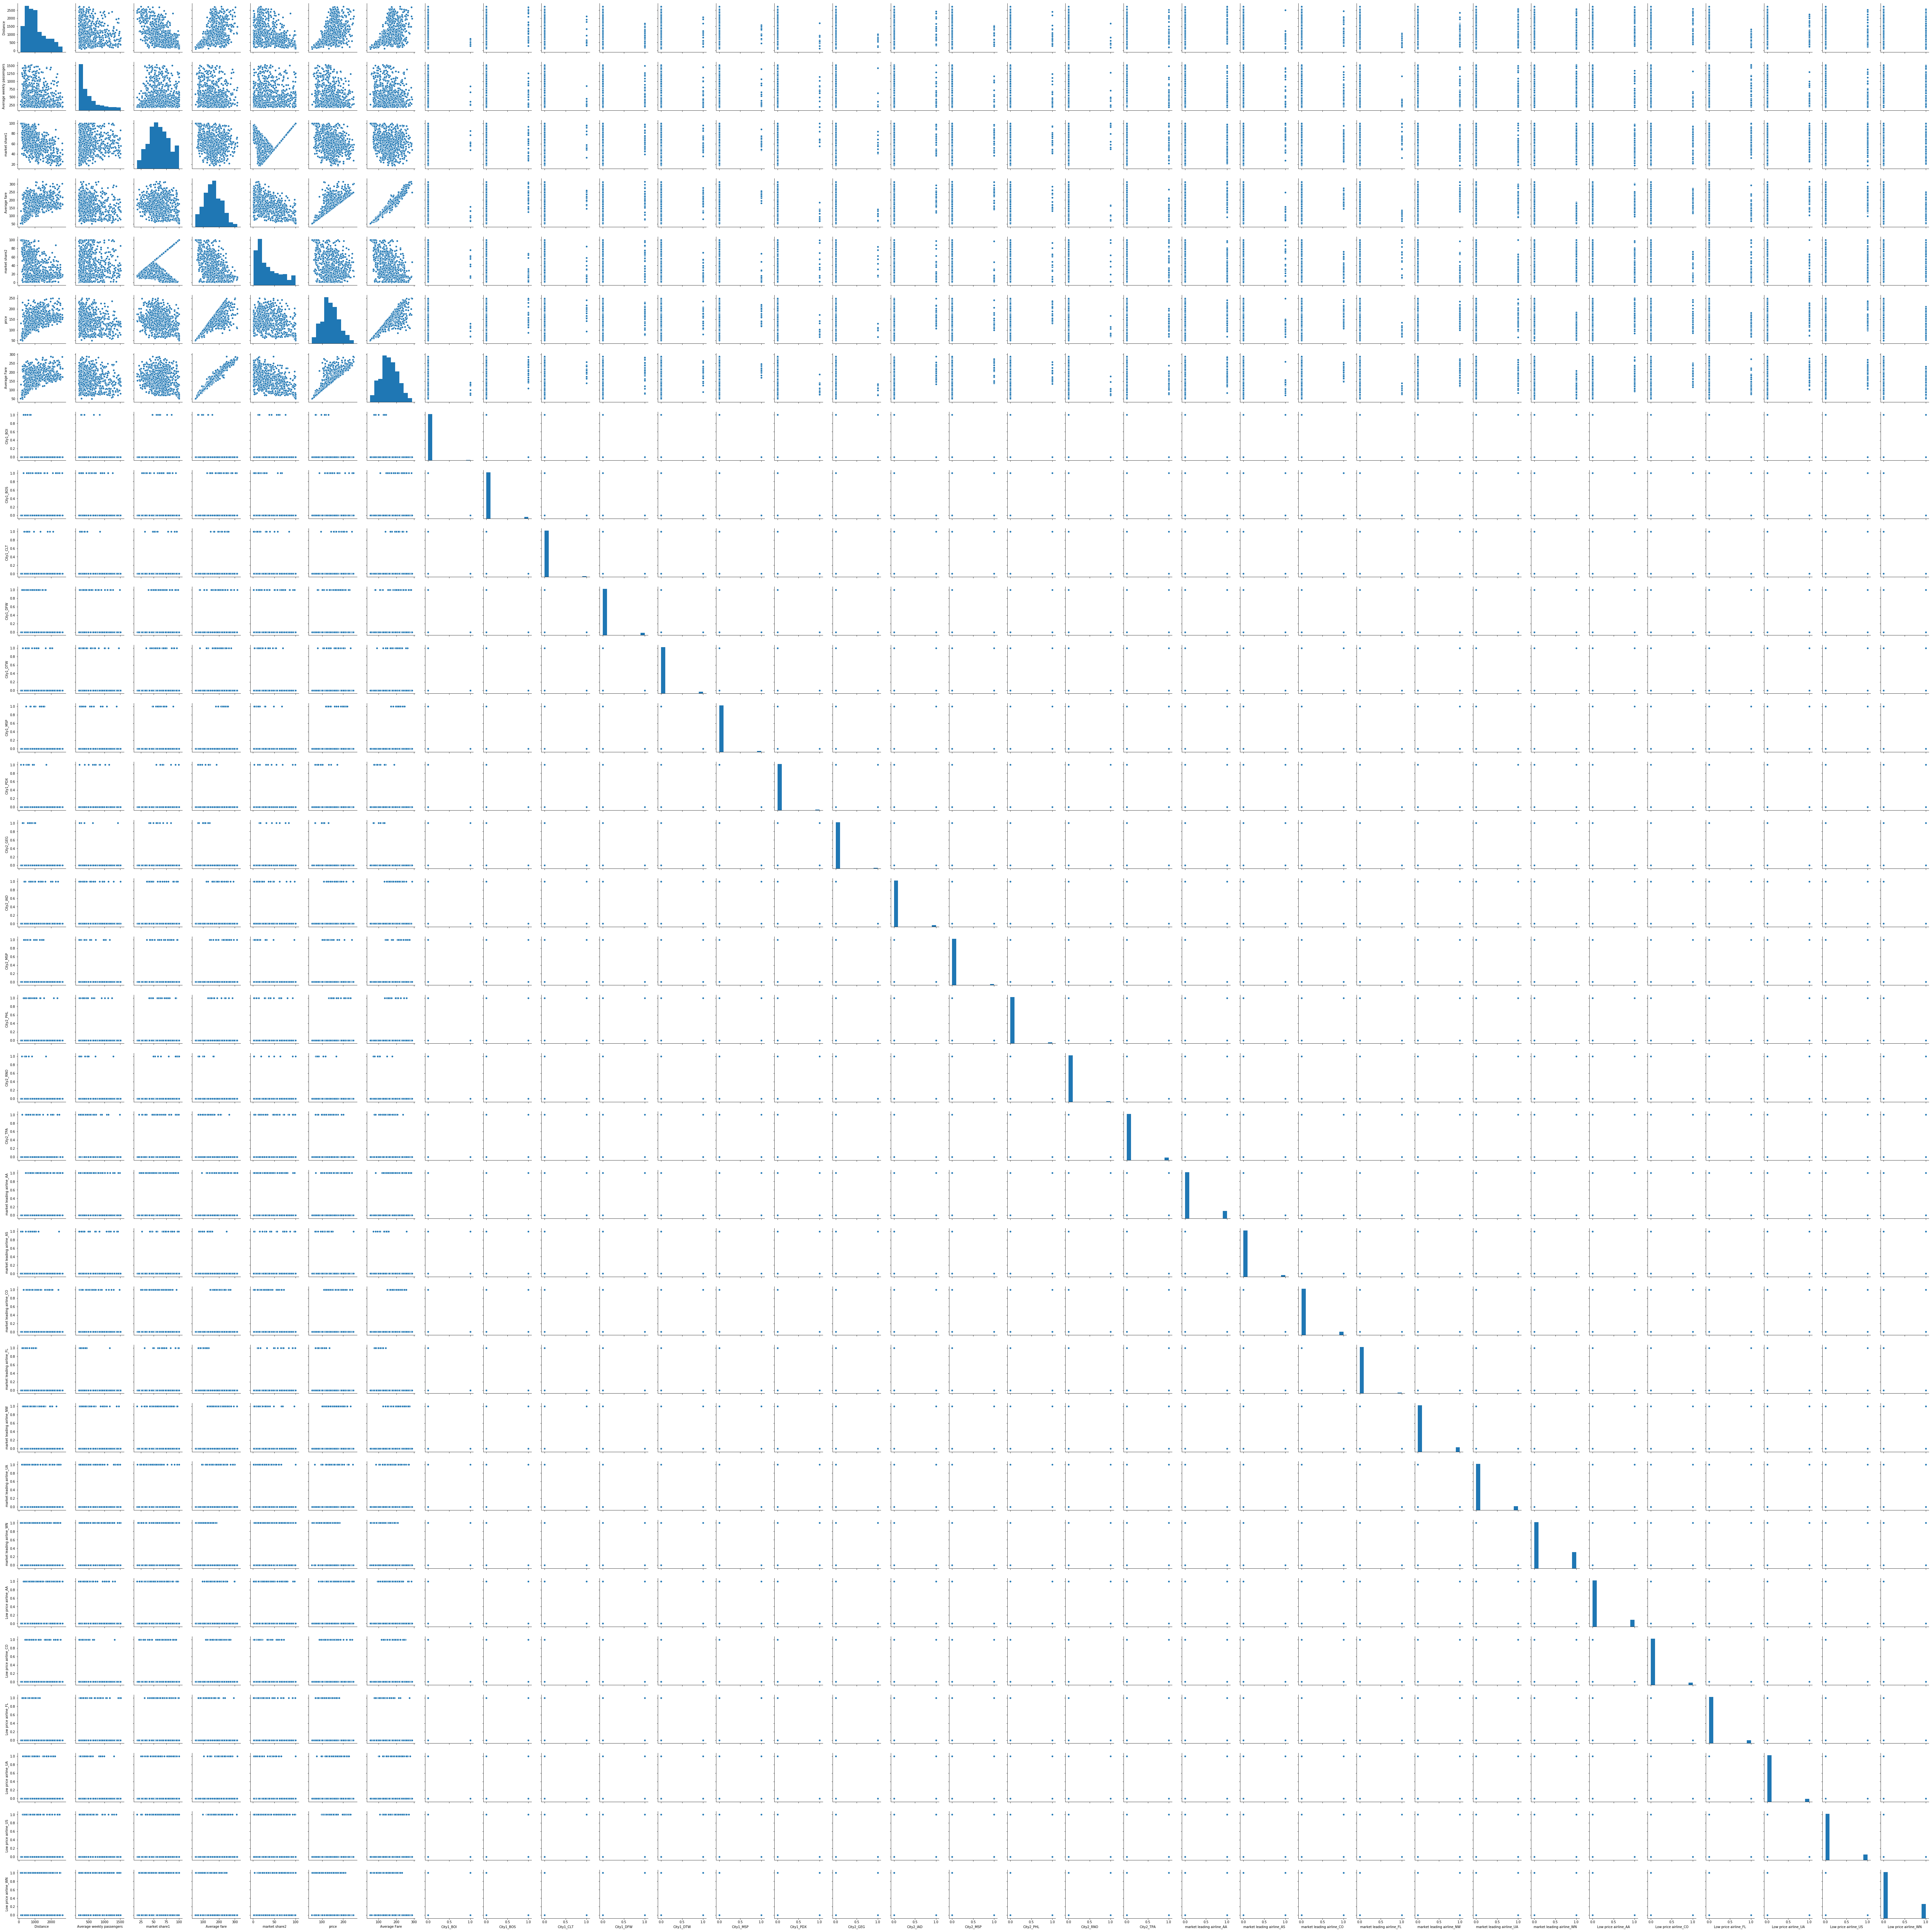

In [14]:
sns.pairplot(df3, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

QUESTION 6 -

Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [16]:
# Copying only the 'tax' and 'income' predictor variables into X dataframe. Since 'consumption' is the dependent variable, we drop it.
X = df3.drop(['Average Fare'], axis=1)

# Copy the 'consumption' column alone into the y dataframe as this is the dependent variable.
Y = df3[['Average Fare']]

In [17]:
##splitting the data into training and testing sets with a 80:20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
##printing the shape of the training set and testing set
print(X_train.shape)
print(X_test.shape)

(708, 32)
(177, 32)


In [19]:
##performing the training operation
linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

QUESTION 7 -

Print the coefficients & intercepts of the linear regression model (5 points)

In [20]:
##estimating the coefficients for each feature 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linreg1.coef_[0][idx]))

The coefficient for Distance is 0.002087341250143228
The coefficient for Average weekly passengers is -0.0030038414193279193
The coefficient for market share1 is 0.05518860777418003
The coefficient for Average fare is 0.730340261523228
The coefficient for market share2 is -0.03430949368878503
The coefficient for price is 0.22580068768748923
The coefficient for City1_BOI is -1.2997209493639363
The coefficient for City1_BOS is 1.2500374844298463
The coefficient for City1_CLT is -3.950670742341082
The coefficient for City1_DFW is -2.1360226221831717
The coefficient for City1_DTW is -0.8473411701385711
The coefficient for City1_MSP is -4.540058554594876
The coefficient for City1_PDX is -0.2744424564354366
The coefficient for City2_GEG is -1.5711567676575606
The coefficient for City2_IAD is 4.904493218066521
The coefficient for City2_MSP is 0.7665610798221388
The coefficient for City2_PHL is -1.5464848251313281
The coefficient for City2_RNO is -2.1810400415058946
The coefficient for City2_T

In [21]:
b0 = linreg1.intercept_
print(b0)

[7.82115062]


QUESTION 8 - 

Print the accuracy of the overall model (2.5 points)

In [22]:
##using the newly created regression model for predicting the depedent variables for the feature values in the training set
predictavgfare = linreg1.predict(X_train)

In [23]:
##computing the mean squared error between the predicted values & observed values of the dependent variable
mse = mean_squared_error(predictavgfare, Y_train)

In [24]:
##calculating the root mean squared error from the mean squared error
rmse = np.sqrt(mse)
rmse 

7.5723859253608925

In [25]:
##R sqaured score (training data)
linreg1.score(X_train, Y_train)

0.975389814097875

In [26]:
##R squared score (testing data)
linreg1.score(X_test, Y_test)

0.9702204205498222